In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def samplebrownian():
    """ Simulates brownian motion and plots one sample path t ↦ Wt
    """
    w = np.random.normal(0, 1, 1000)# Sample 1000 values from normal distrib
    output = []
    for i in range(250):
        t = i/250
        W_t = 0
        for j in range(1, 1000): # Estimate W_t
            W_t += getterm(w[j], j, t)
        output.append(W_t)
    return output
    
def getterm(w_j, j, t):
    return w_j * np.sqrt(2) * np.sin((j-0.5) * np.pi * t)/((j-0.5) * np.pi)

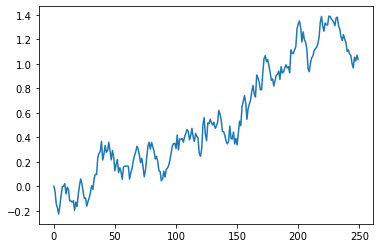

In [3]:
data = samplebrownian()
plt.plot(range(250), data)
plt.show()

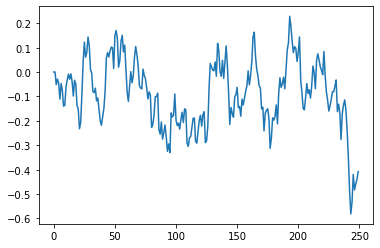

In [4]:
data2 = samplebrownian()
plt.plot(range(250), data2)
plt.show()

In [5]:
# Estimate quadratic variation
def get_quadratic_variation(data):
    output = 0
    for i in range(len(data) - 1):
        output += (data[i] - data[i + 1])**2
    return output

q1 = get_quadratic_variation(data)
q2 = get_quadratic_variation(data2)
print("The quadratic variation are " + str(q1) + " and " + str(q2))

The quadratic variation are 1.0204763376217731 and 0.9719078717261248


Since the theory asserts that the quadratic variation for $$[W,W](T) = T$$ the simulation above agrees with the theory. Thus, $$[W,W](1) = 1$$ is the theoretical value. The values are lower than 1 likely because we have finite time steps for our estimate.

Let $S(t) = S(0)e^{\sigma W(t) + (\alpha - \frac{1}{2} \sigma^2)t}$

<br>
We know $X(t) = S(t)^2$. Then, <br>
$dX(t) = d(S(t)^2)$. Using Ito's Lemma we assert that <br>
$dX(t) = d(S(t)^2) = 2S_tdS_t + \frac{1}{2} \cdot 2 \cdot dS_t \cdot dS_t$
$ \implies dX(t) = 2S_tdS_t + (dS_t)^2$ <br> <br>
We now calculate $dS_t$, <br>
Let $Y = \sigma W(t) + (\alpha - \frac{1}{2} \sigma^2)t$, then <br>
$S_t = S_0 \cdot e^{Y}$ <br>
$\implies dS_t = S_0 \cdot d(e^Y)$ <br>
$\implies dS_t = S_0 \cdot (e^Y \cdot dY + \frac{1}{2} \cdot e^Y \cdot (dY)^2)$ (Using Ito's Lemma) <br><br>

Clearly, <br>
$dY = d(\sigma W(t) + (\alpha - \frac{1}{2} \sigma^2)t) = \sigma dW(t) + (\alpha - \frac{1}{2} \sigma^2)dt$ <br>
And, $(dY)^2 = \sigma^2 (dW(t))^2 + (\alpha - \frac{1}{2} \sigma^2)^2(dt)^2 + 2\sigma \cdot (\alpha - \frac{1}{2} \sigma^2) \cdot dW(t)\cdot dt$ <br>
$\implies (dY)^2 = \sigma^2 (dW(t))^2$ (Since $dW(t)d(t)$ and $(dt)^2$ terms go to 0) <br>
$\implies (dY)^2 = \sigma^2 dt$     [$(dW(t))^2 = dt$ from Ito's lemma] <br> <br>

Plugging $dY$ and $(dY)^2$ back in, <br>
$dS_t = S_0 \cdot (e^Y \cdot (\sigma dW(t) + (\alpha - \frac{1}{2} \sigma^2)dt) + \frac{1}{2} \cdot e^Y \cdot \sigma^2 dt)$ <br>
$dS_t = S_t \cdot (\sigma dW(t) + (\alpha - \frac{1}{2} \sigma^2)dt) + \frac{1}{2}\cdot S_t \cdot \sigma^2 dt$ <br>
$dS_t = S_t \cdot (\sigma dW(t) + \alpha dt)$ <br>

And, <br>
$(dS_t)^2 = S_t^2 \sigma^2 \cdot dt \,$ (all terms except $(dW(t))^2$ are infinitesmal) <br> <br>

Plugging all back into $dX_t$ <br>
$dX_t = 2S_t\cdot(S_t\sigma dW(t) + S_t\alpha dt) + S_t^2 \sigma^2 dt$ <br>
$\mathbf{dX_t = 2S_t^2\sigma dW(t) + (2S_t^2\alpha + S_t^2\sigma^2)dt}$ <br> <br>

<br>
$[X, X](t) = \int_{0}^{T} (dX)^2$ <br>
$\implies \int_{0}^{T} (dX_t)^2 = \int_{0}^{T} 4S_t^4\cdot \sigma^2 (dW(t))^2 = \int_{0}^{T} 4S_t^4\cdot \sigma^2 dt= 4\sigma^2\int_{0}^{T} S_t^4dt$ (all terms except $(dW(t))^2$ are infinitesmal, and $(dW(t))^2 = dt$ from Ito's lemma) <br>

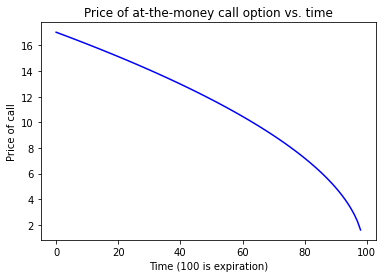

In [6]:
def binom_call_price(S_0, K, T, N, vol, r):
    t = T/N # Time step
    # Use CRR parameters
    u = np.exp(vol * np.sqrt(t))
    d = np.exp(-vol * np.sqrt(t))
    # Calculate risk-free probs
    p = (np.exp(r * t) - d)/(u - d)
    q = 1 - p
    
    tree = [] * (N + 1)
    for i in range(N + 1):
        tree.append([-1] * (N + 1))
    
    # Fill out last row
    for i in range(N + 1):
        price = S_0 * (u**(N - i)) * (d**i)
        tree[N][i] = max(0, price - K)

    # Start from end and loop back
    for i in range(N)[::-1]:
        for j in range(i + 1):
            heads = tree[i + 1][j]
            tails = tree[i + 1][j + 1]
            tree[i][j] = (heads * p + tails * q) * np.exp(-t * r)

    return tree[0][0]  

call_prices = []
for i in range(1, 100)[::-1]: # Get prices further from expiration
    call_prices.append(binom_call_price(100, 100, i * 0.01, 200, 0.4, 0.03))
plt.plot(call_prices, 'b')
plt.xlabel("Time (100 is expiration)")
plt.ylabel("Price of call")
plt.title("Price of at-the-money call option vs. time")
plt.show()

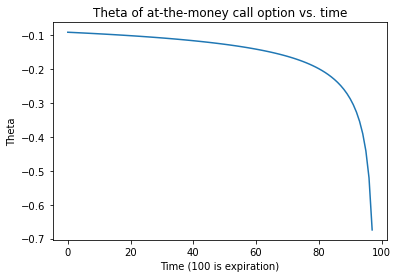

In [9]:
thetas = []
for i in range(len(call_prices) - 1):
    thetas.append(call_prices[i + 1] - call_prices[i])
plt.plot(thetas)
plt.xlabel("Time (100 is expiration)")
plt.ylabel("Theta")
plt.title("Theta of at-the-money call option vs. time")
plt.show()

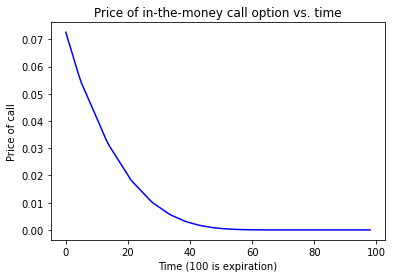

In [10]:
call_prices_far = []
for i in range(1, 100)[::-1]:
    call_prices_far.append(binom_call_price(100, 300, i * 0.01, 200, 0.4, 0.03))
plt.plot(call_prices_far, 'b')
plt.xlabel("Time (100 is expiration)")
plt.ylabel("Price of call")
plt.title("Price of in-the-money call option vs. time")
plt.show()

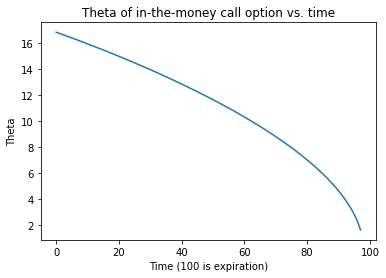

In [11]:
thetas_far = []
for i in range(len(call_prices_far) - 1):
    thetas_far.append(call_prices[i + 1] - call_prices_far[i])
plt.plot(thetas_far)
plt.xlabel("Time (100 is expiration)")
plt.ylabel("Theta")
plt.title("Theta of in-the-money call option vs. time")
plt.show()

The theta becomes more negative for in-the-money calls, but the theta becomes less negative for at-the-money calls.

Using the heat equation, we are going back in time of diffusion. Since there is time from expiration, it means that it is not as close to the payout diagram, i.e, as we move backwards in time the price of the option diffuses as governed by the heat equation.